#### IMPORTS

In [1]:
import torch
import numpy as np

from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim


from model_nn import Model
from torchviz import make_dot


#### LOAD DATA

In [2]:
## Create fake dataset for demonstration purposes

## Load your dataset and use 
images = []
labels = []
for i in range(1000):
    images.append(np.random.randn(10000))
    labels.append(np.random.randint(0,2))

images = np.array(images)
labels = np.array(labels)

#### CREATE BATCHES

In [3]:
# Create an instance of your dataset
dataset = MyCustomDataset(images, labels)

# Define a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


#### TRAINING PARAMETERS

In [6]:
model__ = Model()


criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model__.parameters(), lr=0.001)  # Adam optimizer


In [7]:
model__ = Model()


#### PLOTS

In [13]:
outputs = model__(dataloader.dataset[0][0])

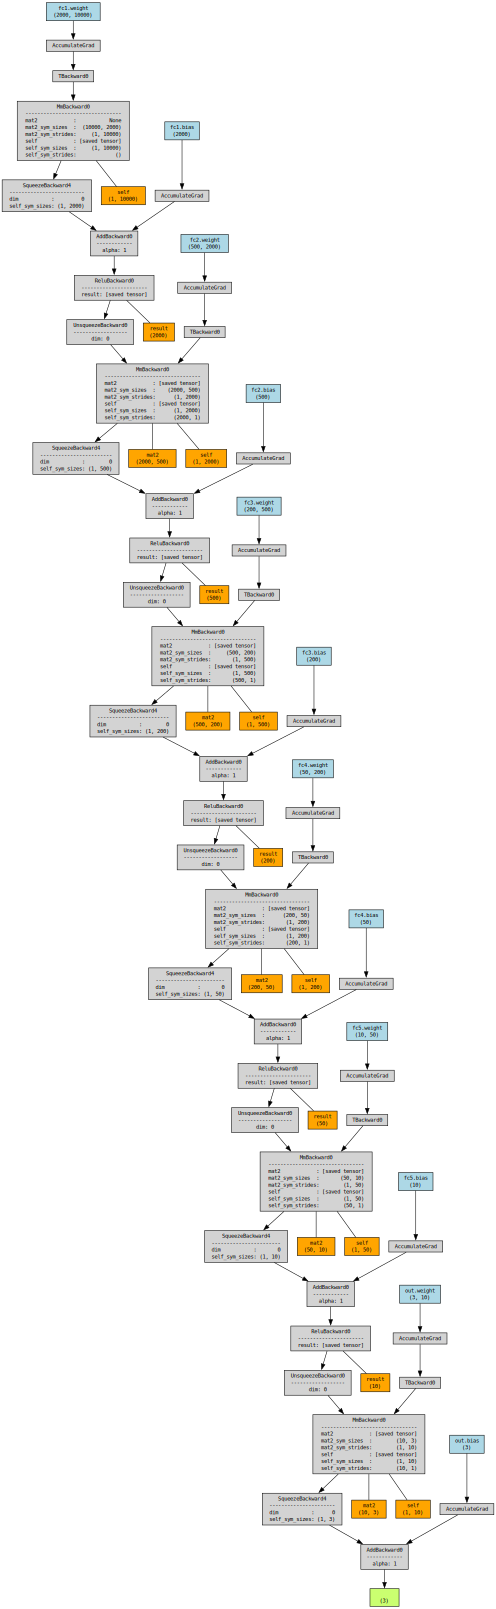

In [18]:
make_dot(outputs,params=dict(model__.named_parameters()), show_attrs=True, show_saved=True)

#### TRAINING


In [ ]:
num_epochs = 25

for epoch in range(num_epochs):
    model__.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(dataloader):
        outputs = model__(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}')


#### Accuracy and Loss Plots

In [ ]:
from plots import accuracy_and_validation_plots


# Example data: Replace these with your actual training and validation data
epochs_= list(range(1, 6))
train_loss_ = [0.7, 0.65, 0.6, 0.55, 0.5]  # Extend to match the number of epochs
val_loss_ = [0.75, 0.7, 0.65, 0.6, 0.58]    # Extend to match the number of epochs
train_accuracy_ = [0.65, 0.7, 0.75, 0.8, 0.85]  # Extend to match the number of epochs
val_accuracy_ = [0.6, 0.65, 0.7, 0.75, 0.78]    # Extend to match the number of epochs

accuracy_and_validation_plots(epochs_, train_loss_, val_loss_, train_accuracy_,val_accuracy_).plot_figure()


#### Model Evaluation 

In [ ]:
# Example usage:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load example data (replace with your own data)
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (replace with your own model)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Create the evaluator and evaluate the model
evaluator = ModelEvaluator(model, X_train, y_train, X_test, y_test, class_names=data.target_names)
metrics = evaluator.evaluate()

# Print the metrics
print("Metrics:", metrics)